## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
df_sales = pd.read_csv('../data/umsatzdaten_gekuerzt.csv')
df_sales.head(10)

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754
5,2013-07-06,1,174.552360
6,2013-07-07,1,92.637755
7,2013-07-08,1,135.500244
8,2013-07-09,1,136.048383
9,2013-07-10,1,135.132314


## Change Warengruppe to fixed names and create timestamp-object 

In [3]:
dmap = {1:"Brot",2:"Broetchen",3:"Croissant",4:"Konditorei",5:"Kuchen",6:"Saisonbrot"}
df_sales["type"] = df_sales["Warengruppe"].map(dmap)

In [4]:
df_sales["timestamp"] = pd.to_datetime(df_sales["Datum"])

df_sales["Month"] = df_sales["timestamp"].apply(lambda time: time.month)
df_sales["Year"] = df_sales["timestamp"].apply(lambda time: time.year)
df_sales["Day"] = df_sales["timestamp"].apply(lambda time: time.day)
df_sales["Day of Week"] = df_sales["timestamp"].apply(lambda time: time.dayofweek)

dmap2 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_sales['Day of Week'] = df_sales['Day of Week'].map(dmap2)

df_sales.head()

,Datum,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week
0,2013-07-01,1,148.828353,Brot,2013-07-01,7,2013,1,Mon
1,2013-07-02,1,159.793757,Brot,2013-07-02,7,2013,2,Tue
2,2013-07-03,1,111.885594,Brot,2013-07-03,7,2013,3,Wed
3,2013-07-04,1,168.864941,Brot,2013-07-04,7,2013,4,Thu
4,2013-07-05,1,171.280754,Brot,2013-07-05,7,2013,5,Fri


## Some Figures for overview with all Products

Text(0.5, 1.0, 'Amount of individual data for each year')

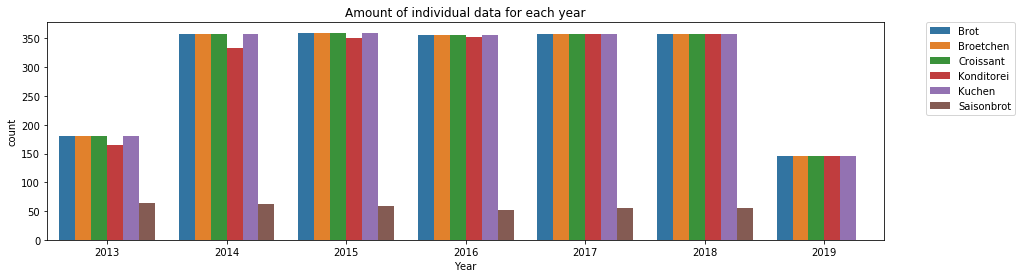

In [5]:
plt.figure(figsize=(15,4))
sns.countplot(x="Year", data=df_sales, hue="type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Amount of individual data for each year")

In [6]:
df_sales_2017 = df_sales[(df_sales["Datum"] > "2017-01-01") & (df_sales["Datum"] < "2018-01-01")]

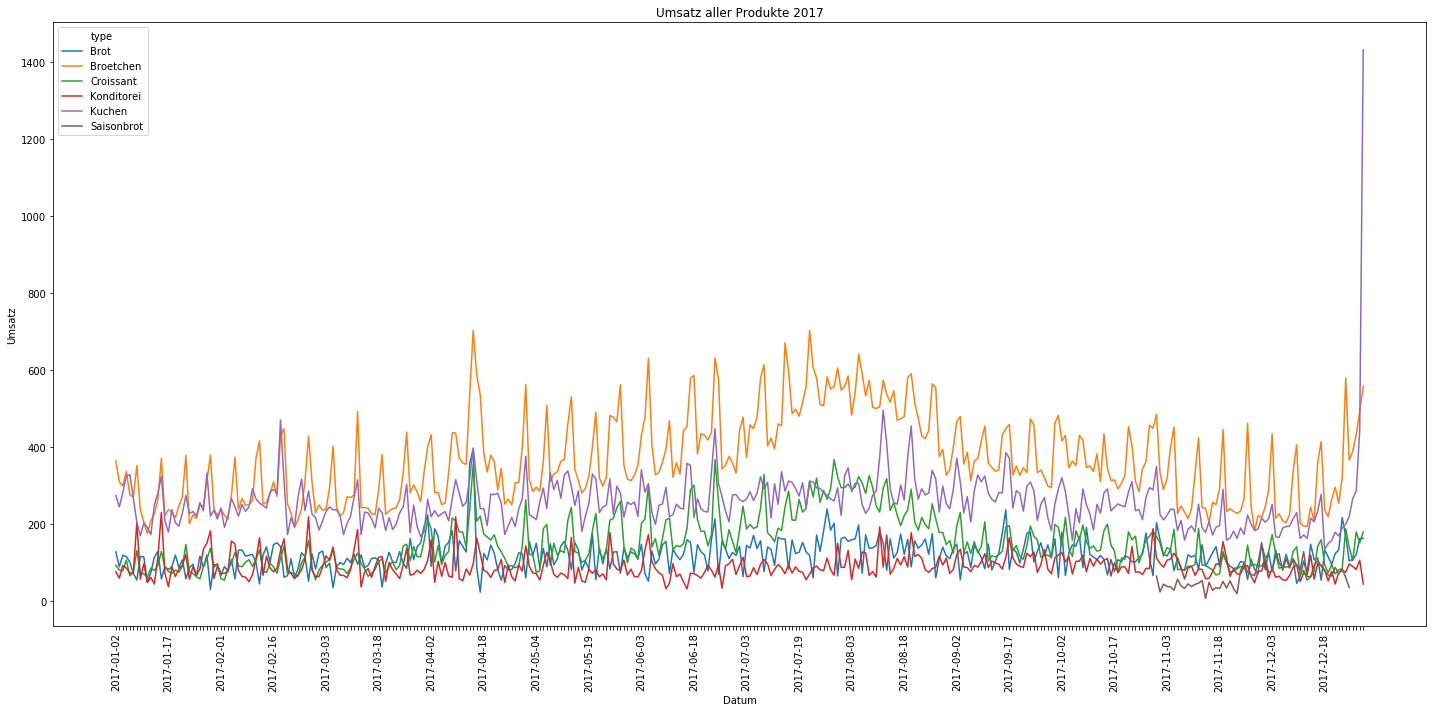

In [8]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_sales_2017, x="Datum",y="Umsatz",hue="type")
plt.title("Umsatz aller Produkte 2017")
plt.xticks(rotation="vertical")

temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::15]))
for label in temp:
    label.set_visible(False)

plt.tight_layout()

## Create just the Bread Column

In [10]:
df = df_sales[df_sales["Warengruppe"]==1]
df.head()

,Datum,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week
0,2013-07-01,1,148.828353,Brot,2013-07-01,7,2013,1,Mon
1,2013-07-02,1,159.793757,Brot,2013-07-02,7,2013,2,Tue
2,2013-07-03,1,111.885594,Brot,2013-07-03,7,2013,3,Wed
3,2013-07-04,1,168.864941,Brot,2013-07-04,7,2013,4,Thu
4,2013-07-05,1,171.280754,Brot,2013-07-05,7,2013,5,Fri


In [12]:
df[df["Datum"]=="2013-12-31"]

,Datum,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week
180,2013-12-31,1,211.390838,Brot,2013-12-31,12,2013,31,Tue


In [13]:
len(df["Datum"])

2115

## Create continoues Date Frame

In [14]:
idx = pd.date_range(df["Datum"].min(),df["Datum"].max(), freq="D")
len(idx)

2161

In [15]:
df_alldate = pd.DataFrame(data=idx)

In [16]:
# 0 if store was cloesed and 1 if it was open
def filler(a,b):
    result = []
    for elem in a:
        if elem not in b[:,0]:
            test = [elem, 0]
        else:           
            test =  [elem, 100]
            
        result.append(test)
    
    return result

In [17]:
alldata = filler(np.array(idx.strftime("%Y-%m-%d")), np.array(df))
alldata[:5]

[['2013-07-01', 100],
 ['2013-07-02', 100],
 ['2013-07-03', 100],
 ['2013-07-04', 100],
 ['2013-07-05', 100]]

In [18]:
alldata = np.array(alldata)
df_all = pd.DataFrame(data=alldata)
df_all = df_all.rename(columns={0:"Datum",1:"Open"})
df_all.head()

,Datum,Open
0,2013-07-01,100
1,2013-07-02,100
2,2013-07-03,100
3,2013-07-04,100
4,2013-07-05,100


In [19]:
df_all[df_all["Datum"]=="2017-10-31"]

,Datum,Open
1583,2017-10-31,0


In [20]:
len(df_all)

2161

In [21]:
df_all["Open"] = df_all["Open"].astype(str).astype(int)
df_brot = pd.merge(df_all,df, on="Datum", how="left").fillna(0)
df_brot.head()

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week
0,2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue
2,2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed
3,2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri


In [22]:
len(df_brot)

2161

In [23]:
df_brot[df_brot["Datum"]=="2017-10-31"]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week
1583,2017-10-31,0,0.0,0.0,0,0,0.0,0.0,0.0,0


## Create column for the kieler woche

In [24]:
df_kiwo = pd.read_csv("../data/kiwo.csv")
df_kiwo.head()

,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1


In [25]:
df_brot = pd.merge(df_brot,df_kiwo,on="Datum",how="left").fillna(0)

In [26]:
len(df_brot)

2161

In [27]:
df_brot.head()

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,KielerWoche
0,2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon,0.0
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,0.0
2,2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed,0.0
3,2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu,0.0
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,0.0


## Create column for national holidays

In [28]:
import requests
import pandas as pd
import csv

years = range(2013, 2020, 1)

holidays_raw = []
for year in years:
    url = 'https://feiertage-api.de/api/?jahr=' + str(year) + '&nur_land=SH'
    holidays_raw.append(requests.get(url).json())
    
print(holidays_raw)

[{'Neujahrstag': {'datum': '2013-01-01', 'hinweis': ''}, 'Karfreitag': {'datum': '2013-03-29', 'hinweis': ''}, 'Ostermontag': {'datum': '2013-04-01', 'hinweis': ''}, 'Tag der Arbeit': {'datum': '2013-05-01', 'hinweis': ''}, 'Christi Himmelfahrt': {'datum': '2013-05-09', 'hinweis': ''}, 'Pfingstmontag': {'datum': '2013-05-20', 'hinweis': ''}, 'Tag der Deutschen Einheit': {'datum': '2013-10-03', 'hinweis': ''}, '1. Weihnachtstag': {'datum': '2013-12-25', 'hinweis': ''}, '2. Weihnachtstag': {'datum': '2013-12-26', 'hinweis': ''}}, {'Neujahrstag': {'datum': '2014-01-01', 'hinweis': ''}, 'Karfreitag': {'datum': '2014-04-18', 'hinweis': ''}, 'Ostermontag': {'datum': '2014-04-21', 'hinweis': ''}, 'Tag der Arbeit': {'datum': '2014-05-01', 'hinweis': ''}, 'Christi Himmelfahrt': {'datum': '2014-05-29', 'hinweis': ''}, 'Pfingstmontag': {'datum': '2014-06-09', 'hinweis': ''}, 'Tag der Deutschen Einheit': {'datum': '2014-10-03', 'hinweis': ''}, '1. Weihnachtstag': {'datum': '2014-12-25', 'hinweis':

In [29]:
df_holidays = pd.DataFrame([])

for i in range(7):
    df_holiday_year = pd.DataFrame.from_dict(holidays_raw[i])
    df_holidays = pd.concat([df_holidays, df_holiday_year])
                            
odd=[];

for num in range(7*2):
    if num %2 !=0:
        odd.append(num)
        
df_holidays = df_holidays.drop(df_holidays.index[odd])

df_holidays

,Neujahrstag,Karfreitag,Ostermontag,Tag der Arbeit,Christi Himmelfahrt,Pfingstmontag,Tag der Deutschen Einheit,1. Weihnachtstag,2. Weihnachtstag,Reformationstag
datum,2013-01-01,2013-03-29,2013-04-01,2013-05-01,2013-05-09,2013-05-20,2013-10-03,2013-12-25,2013-12-26,NaN
datum,2014-01-01,2014-04-18,2014-04-21,2014-05-01,2014-05-29,2014-06-09,2014-10-03,2014-12-25,2014-12-26,NaN
datum,2015-01-01,2015-04-03,2015-04-06,2015-05-01,2015-05-14,2015-05-25,2015-10-03,2015-12-25,2015-12-26,NaN
datum,2016-01-01,2016-03-25,2016-03-28,2016-05-01,2016-05-05,2016-05-16,2016-10-03,2016-12-25,2016-12-26,NaN
datum,2017-01-01,2017-04-14,2017-04-17,2017-05-01,2017-05-25,2017-06-05,2017-10-03,2017-12-25,2017-12-26,2017-10-31
datum,2018-01-01,2018-03-30,2018-04-02,2018-05-01,2018-05-10,2018-05-21,2018-10-03,2018-12-25,2018-12-26,2018-10-31
datum,2019-01-01,2019-04-19,2019-04-22,2019-05-01,2019-05-30,2019-06-10,2019-10-03,2019-12-25,2019-12-26,2019-10-31


In [30]:
df_holidays = df_holidays.reset_index(drop=True)

In [31]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Neujahrstag                7 non-null      object
 1   Karfreitag                 7 non-null      object
 2   Ostermontag                7 non-null      object
 3   Tag der Arbeit             7 non-null      object
 4   Christi Himmelfahrt        7 non-null      object
 5   Pfingstmontag              7 non-null      object
 6   Tag der Deutschen Einheit  7 non-null      object
 7   1. Weihnachtstag           7 non-null      object
 8   2. Weihnachtstag           7 non-null      object
 9   Reformationstag            3 non-null      object
dtypes: object(10)
memory usage: 688.0+ bytes


In [32]:
df_holidays = df_holidays.drop(["Reformationstag"],axis=1)

In [33]:
df_holidays

,Neujahrstag,Karfreitag,Ostermontag,Tag der Arbeit,Christi Himmelfahrt,Pfingstmontag,Tag der Deutschen Einheit,1. Weihnachtstag,2. Weihnachtstag
0,2013-01-01,2013-03-29,2013-04-01,2013-05-01,2013-05-09,2013-05-20,2013-10-03,2013-12-25,2013-12-26
1,2014-01-01,2014-04-18,2014-04-21,2014-05-01,2014-05-29,2014-06-09,2014-10-03,2014-12-25,2014-12-26
2,2015-01-01,2015-04-03,2015-04-06,2015-05-01,2015-05-14,2015-05-25,2015-10-03,2015-12-25,2015-12-26
3,2016-01-01,2016-03-25,2016-03-28,2016-05-01,2016-05-05,2016-05-16,2016-10-03,2016-12-25,2016-12-26
4,2017-01-01,2017-04-14,2017-04-17,2017-05-01,2017-05-25,2017-06-05,2017-10-03,2017-12-25,2017-12-26
5,2018-01-01,2018-03-30,2018-04-02,2018-05-01,2018-05-10,2018-05-21,2018-10-03,2018-12-25,2018-12-26
6,2019-01-01,2019-04-19,2019-04-22,2019-05-01,2019-05-30,2019-06-10,2019-10-03,2019-12-25,2019-12-26


In [34]:
holiday_ostersonntag = pd.Series([
'2013-03-31',
'2014-04-20',
'2015-04-05',
'2016-03-27',
'2017-04-16',
'2018-04-01',
'2019-04-21'], 
name="Ostersonntag")

holiday_ostersonntag
df_holidays = pd.concat([df_holidays,holiday_ostersonntag], axis=1)

In [35]:
df_holidays

,Neujahrstag,Karfreitag,Ostermontag,Tag der Arbeit,Christi Himmelfahrt,Pfingstmontag,Tag der Deutschen Einheit,1. Weihnachtstag,2. Weihnachtstag,Ostersonntag
0,2013-01-01,2013-03-29,2013-04-01,2013-05-01,2013-05-09,2013-05-20,2013-10-03,2013-12-25,2013-12-26,2013-03-31
1,2014-01-01,2014-04-18,2014-04-21,2014-05-01,2014-05-29,2014-06-09,2014-10-03,2014-12-25,2014-12-26,2014-04-20
2,2015-01-01,2015-04-03,2015-04-06,2015-05-01,2015-05-14,2015-05-25,2015-10-03,2015-12-25,2015-12-26,2015-04-05
3,2016-01-01,2016-03-25,2016-03-28,2016-05-01,2016-05-05,2016-05-16,2016-10-03,2016-12-25,2016-12-26,2016-03-27
4,2017-01-01,2017-04-14,2017-04-17,2017-05-01,2017-05-25,2017-06-05,2017-10-03,2017-12-25,2017-12-26,2017-04-16
5,2018-01-01,2018-03-30,2018-04-02,2018-05-01,2018-05-10,2018-05-21,2018-10-03,2018-12-25,2018-12-26,2018-04-01
6,2019-01-01,2019-04-19,2019-04-22,2019-05-01,2019-05-30,2019-06-10,2019-10-03,2019-12-25,2019-12-26,2019-04-21


In [36]:
holiday_pfingstsonntag = pd.Series([
'2013-05-19',
'2014-06-08',
'2015-05-24',
'2016-05-15',
'2017-06-04',
'2018-05-20',
'2019-06-09'],
    name="Pfingstsonntag")

holiday_pfingstsonntag
df_holidays = pd.concat([df_holidays,holiday_pfingstsonntag], axis=1)

In [37]:
holiday_Valentinstag = pd.Series([
'2013-02-14',
'2014-02-14',
'2015-02-14',
'2016-02-14',
'2017-02-14',
'2018-02-14',
'2019-02-14'],
    name="Valentinstag")

holiday_Valentinstag
df_holidays = pd.concat([df_holidays,holiday_Valentinstag], axis=1)

In [38]:
holiday_Silvester = pd.Series([
'2013-12-31',
'2014-12-31',
'2015-12-31',
'2016-12-31',
'2017-12-31',
'2018-12-31',
'2019-12-31'],
    name="Silvester")

holiday_Silvester
df_holidays = pd.concat([df_holidays,holiday_Silvester], axis=1)

In [39]:
holiday_Halloween = pd.Series([
'2013-12-31',
'2014-10-31',
'2015-10-31',
'2016-10-31',
'2017-10-31',
'2018-10-31',
'2019-10-31'],
    name="Halloween")

holiday_Halloween
df_holidays = pd.concat([df_holidays,holiday_Halloween], axis=1)

In [40]:
holiday_Heiligabend = pd.Series([
'2013-12-24',
'2014-12-24',
'2015-12-24',
'2016-12-24',
'2017-12-24',
'2018-12-24',
'2019-12-24'],
    name="Heiligabend")

holiday_Heiligabend
df_holidays = pd.concat([df_holidays,holiday_Heiligabend], axis=1)

In [41]:
holiday_Muttertag = pd.Series([
'2013-12-24',
'2014-12-24',
'2015-12-24',
'2016-12-24',
'2017-12-24',
'2018-12-24',
'2019-12-24'],
    name="Muttertag")

holiday_Muttertag
df_holidays = pd.concat([df_holidays,holiday_Muttertag], axis=1)

In [42]:
df_holidays = df_holidays.stack().reset_index()

df_holidays = df_holidays.drop(["level_0"],axis=1)
df_holidays = df_holidays.rename(columns={"level_1":"holiday",0:"Datum"})
df_holidays["Datum"] = pd.to_datetime(df_holidays["Datum"])

## Schulferien

## Code for importing Schoolholidays
# school holiday via json are only avaible from 2017 till now

school_holidays_manually = [{'start':'2013-03-25', 'end':'2013-04-09', 'name':'osterferien'}, \
        {'start':'2013-05-10', 'end':'2013-05-10', 'name':'pfingstferien'}, \
        {'start':'2013-06-24', 'end':'2013-08-03', 'name':'sommerferien'}, \
        {'start':'2013-10-21', 'end':'2013-11-02', 'name':'herbstferien'}, \
        {'start':'2013-12-23', 'end':'2014-01-04', 'name':'weihnachtsferien'}, \
        {'start':'2014-04-16', 'end':'2014-05-02', 'name':'osterferien'}, \
        {'start':'2014-05-30', 'end':'2014-05-30', 'name':'pfingstferien'}, \
        {'start':'2014-07-14', 'end':'2014-08-23', 'name':'sommerferien'}, \
        {'start':'2014-10-13', 'end':'2014-10-25', 'name':'herbstferien'}, \
        {'start':'2014-12-22', 'end':'2015-01-03', 'name':'weihnachtsferien'}, \
        {'start':'2015-04-01', 'end':'2015-04-17', 'name':'osterferien'}, \
        {'start':'2015-05-15', 'end':'2015-05-15', 'name':'pfingstferien'}, \
        {'start':'2015-07-20', 'end':'2015-08-29', 'name':'sommerferien'}, \
        {'start':'2015-10-19', 'end':'2015-10-31', 'name':'herbstferien'}, \
        {'start':'2015-12-23', 'end':'2016-01-02', 'name':'weihnachtsferien'}, \
        {'start':'2016-03-23', 'end':'2016-04-09', 'name':'osterferien'}, \
        {'start':'2016-05-06', 'end':'2016-05-06', 'name':'pfingstferien'}, \
        {'start':'2016-07-25', 'end':'2016-09-03', 'name':'sommerferien'}, \
        {'start':'2016-10-17', 'end':'2016-10-29', 'name':'herbstferien'}, \
        {'start':'2016-12-23', 'end':'2016-12-31', 'name':'weihnachtsferien'}]

periods = {}
for p in school_holidays_manually:
    date_range = pd.date_range(p['start'], p['end'], freq = "D")

    for day in date_range:
        periods.update( {day.strftime('%Y-%m-%d'):p['name']} )
            
periods

# school holiday get online

years = range(2017, 2020, 1)

school_holidays = []
for year in years:
    url = 'https://ferien-api.de/api/v1/holidays/SH/' + str(year)
    school_holidays.append(requests.get(url).json())
    
#print(school_holidays)

for years in school_holidays:
    for p in years:
        date_range = pd.date_range(p['start'], p['end'], freq = "D")
        
        for day in date_range:
            periods.update( {day.strftime('%Y-%m-%d'):p['name']} )
            
periods

df_school_holidays = pd.DataFrame.from_dict(periods, columns=['school_holiday'], orient='index')
df_school_holidays

#df_school_holidays.to_csv("school_holidays.csv")

In [44]:
df_school_holidays = pd.read_csv("school_holidays.csv", sep=",")

In [45]:
df_school_holidays

,Unnamed: 0,school_holiday
0,2013-03-25,osterferien
1,2013-03-26,osterferien
2,2013-03-27,osterferien
3,2013-03-28,osterferien
4,2013-03-29,osterferien
...,...,...
609,2020-01-03,weihnachtsferien
610,2020-01-04,weihnachtsferien
611,2020-01-05,weihnachtsferien
612,2020-01-06,weihnachtsferien


In [46]:
df_school_holidays = df_school_holidays.rename(columns={"Unnamed: 0":"Datum"})
df_school_holidays["Datum"] = pd.to_datetime(df_school_holidays["Datum"])

In [47]:
df_school_holidays

,Datum,school_holiday
0,2013-03-25,osterferien
1,2013-03-26,osterferien
2,2013-03-27,osterferien
3,2013-03-28,osterferien
4,2013-03-29,osterferien
...,...,...
609,2020-01-03,weihnachtsferien
610,2020-01-04,weihnachtsferien
611,2020-01-05,weihnachtsferien
612,2020-01-06,weihnachtsferien


In [48]:
df_school_holidays = pd.get_dummies(df_school_holidays, columns=['school_holiday'])

In [49]:
df_school_holidays["Datum"] = pd.to_datetime(df_school_holidays["Datum"])

In [50]:
df_school_holidays

,Datum,school_holiday_herbstferien,school_holiday_osterferien,school_holiday_pfingstferien,school_holiday_sommerferien,school_holiday_weihnachtsferien
0,2013-03-25,0,1,0,0,0
1,2013-03-26,0,1,0,0,0
2,2013-03-27,0,1,0,0,0
3,2013-03-28,0,1,0,0,0
4,2013-03-29,0,1,0,0,0
...,...,...,...,...,...,...
609,2020-01-03,0,0,0,0,1
610,2020-01-04,0,0,0,0,1
611,2020-01-05,0,0,0,0,1
612,2020-01-06,0,0,0,0,1


In [51]:
df_brot["Datum"] = pd.to_datetime(df_brot["Datum"])
df_brot = df_brot.merge(df_school_holidays, how="left", left_on="Datum", right_on="Datum").fillna(0)

In [55]:
df_holidays = pd.read_csv("holidays.csv", sep=",")

In [57]:
df_holidays[df_holidays["holiday"]=="Halloween"]

,Unnamed: 0,holiday,Datum
13,13,Halloween,2013-12-31
29,29,Halloween,2014-10-31
45,45,Halloween,2015-10-31
61,61,Halloween,2016-10-31
77,77,Halloween,2017-10-31
93,93,Halloween,2018-10-31
109,109,Halloween,2019-10-31


In [58]:
df_holidays = df_holidays.drop(["Unnamed: 0"],axis=1)

In [59]:
df_holidays = pd.get_dummies(df_holidays, columns=['holiday'])

In [61]:
df_holidays

,Datum,holiday_1. Weihnachtstag,holiday_2. Weihnachtstag,holiday_Christi Himmelfahrt,holiday_Halloween,holiday_Heiligabend,holiday_Karfreitag,holiday_Muttertag,holiday_Neujahrstag,holiday_Ostermontag,holiday_Ostersonntag,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag
0,2013-01-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2013-03-29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2013-04-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2013-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2013-05-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2019-02-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
108,2019-12-31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
109,2019-10-31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
110,2019-12-24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df_holidays["Datum"] = pd.to_datetime(df_holidays["Datum"])

In [64]:
df_brot["Datum"] = pd.to_datetime(df_brot["Datum"])

In [66]:
df_brot[df_brot["Datum"]=="2017-10-31"]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,KielerWoche,school_holiday_herbstferien,school_holiday_osterferien,school_holiday_pfingstferien,school_holiday_sommerferien,school_holiday_weihnachtsferien
1583,2017-10-31,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df_holidays[df_holidays["Datum"] == "2017-10-31"]

,Datum,holiday_1. Weihnachtstag,holiday_2. Weihnachtstag,holiday_Christi Himmelfahrt,holiday_Halloween,holiday_Heiligabend,holiday_Karfreitag,holiday_Muttertag,holiday_Neujahrstag,holiday_Ostermontag,holiday_Ostersonntag,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag
77,2017-10-31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df_brot = df_brot.merge(df_holidays, how="left", left_on="Datum", right_on="Datum").fillna(0)

In [69]:
df_brot

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Muttertag,holiday_Neujahrstag,holiday_Ostermontag,holiday_Ostersonntag,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag
0,2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,2019-05-27,100,1.0,135.089885,Brot,2019-05-27 00:00:00,5.0,2019.0,27.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2164,2019-05-28,100,1.0,154.363980,Brot,2019-05-28 00:00:00,5.0,2019.0,28.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2165,2019-05-29,100,1.0,190.850121,Brot,2019-05-29 00:00:00,5.0,2019.0,29.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2166,2019-05-30,100,1.0,85.145930,Brot,2019-05-30 00:00:00,5.0,2019.0,30.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_brot[df_brot["Datum"]=="2013-03-29"].columns.values

array(['Datum', 'Open', 'Warengruppe', 'Umsatz', 'type', 'timestamp',
       'Month', 'Year', 'Day', 'Day of Week', 'KielerWoche',
       'school_holiday_herbstferien', 'school_holiday_osterferien',
       'school_holiday_pfingstferien', 'school_holiday_sommerferien',
       'school_holiday_weihnachtsferien', 'holiday_1. Weihnachtstag',
       'holiday_2. Weihnachtstag', 'holiday_Christi Himmelfahrt',
       'holiday_Halloween', 'holiday_Heiligabend', 'holiday_Karfreitag',
       'holiday_Muttertag', 'holiday_Neujahrstag', 'holiday_Ostermontag',
       'holiday_Ostersonntag', 'holiday_Pfingstmontag',
       'holiday_Pfingstsonntag', 'holiday_Silvester',
       'holiday_Tag der Arbeit', 'holiday_Tag der Deutschen Einheit',
       'holiday_Valentinstag'], dtype=object)

In [72]:
df_brot.drop(["Warengruppe","type","Year","Day","Day of Week","timestamp"],axis=1)

,Datum,Open,Umsatz,Month,KielerWoche,school_holiday_herbstferien,school_holiday_osterferien,school_holiday_pfingstferien,school_holiday_sommerferien,school_holiday_weihnachtsferien,...,holiday_Muttertag,holiday_Neujahrstag,holiday_Ostermontag,holiday_Ostersonntag,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag
0,2013-07-01,100,148.828353,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-07-02,100,159.793757,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-07-03,100,111.885594,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-07-04,100,168.864941,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-07-05,100,171.280754,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,2019-05-27,100,135.089885,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2164,2019-05-28,100,154.363980,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2165,2019-05-29,100,190.850121,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2166,2019-05-30,100,85.145930,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create Array for weather data

In [73]:
df_weather = pd.read_csv('../data/wetter.csv')

In [74]:
df_weather.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


In [75]:
len(df_weather)

2601

In [76]:
df_weather_2017 = df_weather[(df_weather["Datum"] > "2017-01-01") & (df_weather["Datum"] < "2018-01-01")]

In [78]:
df_weather["Datum"] = pd.to_datetime(df_weather["Datum"])
df_brot = pd.merge(df_brot,df_weather,on="Datum",how="left")
len(df_brot)

2168

In [79]:
df_brot.corr()

,Open,Warengruppe,Umsatz,Month,Year,Day,KielerWoche,school_holiday_herbstferien,school_holiday_osterferien,school_holiday_pfingstferien,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Open,1.000000,1.000000,0.403268,0.264925,0.999982,0.253847,0.021436,0.013251,-0.088951,0.008960,...,-0.059647,0.007079,0.007756,-0.296875,0.007756,0.007756,-0.060770,0.055716,-0.052450,0.008268
Warengruppe,1.000000,1.000000,0.403268,0.264925,0.999982,0.253847,0.021436,0.013251,-0.088951,0.008960,...,-0.059647,0.007079,0.007756,-0.296875,0.007756,0.007756,-0.060770,0.055716,-0.052450,0.008268
Umsatz,0.403268,0.403268,1.000000,0.172998,0.403360,0.150170,0.046254,0.008990,0.042671,0.054014,...,-0.055141,-0.031033,0.137632,-0.129477,-0.069069,-0.010570,-0.098061,0.210613,0.017004,-0.043406
Month,0.264925,0.264925,0.172998,1.000000,0.263502,0.062701,-0.016405,0.199039,-0.173797,-0.023965,...,-0.027042,-0.013527,0.082918,-0.082449,0.053300,-0.065172,0.009541,0.253307,-0.116285,0.033845
Year,0.999982,0.999982,0.403360,0.263502,1.000000,0.253824,0.021462,0.013074,-0.088566,0.009128,...,-0.059705,0.007087,0.007675,-0.296868,0.007675,0.007856,-0.060784,0.054987,-0.052303,0.007646
Day,0.253847,0.253847,0.150170,0.062701,0.253824,1.000000,0.113292,0.085247,-0.071595,0.029341,...,-0.023815,-0.006628,0.091603,-0.089846,-0.073172,-0.008439,0.019050,0.017885,-0.018817,0.007737
KielerWoche,0.021436,0.021436,0.046254,-0.016405,0.021462,0.113292,1.000000,-0.029410,-0.032183,-0.008860,...,-0.007000,-0.007000,-0.007670,-0.007670,-0.007670,-0.007670,0.010371,0.133910,0.015534,0.065989
school_holiday_herbstferien,0.013251,0.013251,0.008990,0.199039,0.013074,0.085247,-0.029410,1.000000,-0.044653,-0.012294,...,-0.009712,-0.009712,-0.010642,-0.010642,0.034596,-0.010642,0.033684,0.031472,-0.075233,-0.021057
school_holiday_osterferien,-0.088951,-0.088951,0.042671,-0.173797,-0.088566,-0.071595,-0.032183,-0.044653,1.000000,-0.013453,...,-0.010628,-0.010628,-0.011645,0.030016,-0.011645,-0.011645,-0.062139,-0.056973,0.093044,-0.043862
school_holiday_pfingstferien,0.008960,0.008960,0.054014,-0.023965,0.009128,0.029341,-0.008860,-0.012294,-0.013453,1.000000,...,-0.002926,-0.002926,-0.003206,-0.003206,-0.003206,-0.003206,-0.054300,0.055702,-0.013896,-0.046500


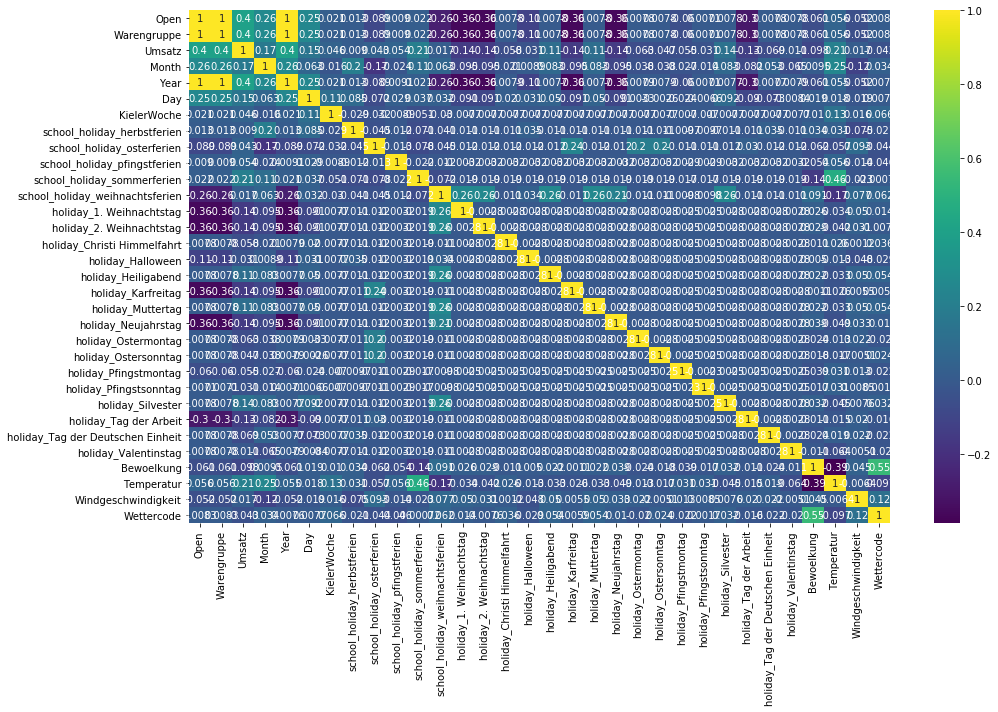

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df_brot.corr(),annot=True, cmap='viridis')
plt.tight_layout()

## feature engeniering the nan values

In [81]:
df_brot.head()

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,17.8375,15.0,20.0
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.3125,10.0,NaN
2,2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0750,6.0,61.0
3,2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.8500,7.0,20.0
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,19.9750,12.0,NaN


In [82]:
df_brot[df_brot["Wettercode"].isnull()]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.3125,10.0,NaN
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,19.9750,12.0,NaN
5,2013-07-06,100,1.0,174.552360,Brot,2013-07-06 00:00:00,7.0,2013.0,6.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9625,8.0,NaN
6,2013-07-07,100,1.0,92.637755,Brot,2013-07-07 00:00:00,7.0,2013.0,7.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3750,9.0,NaN
8,2013-07-09,100,1.0,136.048383,Brot,2013-07-09 00:00:00,7.0,2013.0,9.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.2750,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2019-05-15,100,1.0,151.544952,Brot,2019-05-15 00:00:00,5.0,2019.0,15.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.9000,11.0,NaN
2161,2019-05-25,100,1.0,176.363730,Brot,2019-05-25 00:00:00,5.0,2019.0,25.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,13.5375,14.0,NaN
2163,2019-05-27,100,1.0,135.089885,Brot,2019-05-27 00:00:00,5.0,2019.0,27.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.2625,13.0,NaN
2164,2019-05-28,100,1.0,154.363980,Brot,2019-05-28 00:00:00,5.0,2019.0,28.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,13.1625,12.0,NaN


In [83]:
#https://www.meteopool.org/de/encyclopedia-wmo-ww-wx-code-id2 <-- weather code see unique()
#df_weather["Wettercode"].value_counts()
# 600+ entries without weathercodes -> convert into code 0
mask = df_brot[df_brot["Wettercode"].isnull()].index

for elem in mask:    
    df_brot.loc[elem,"Wettercode"] = 0

In [84]:
df_brot[df_brot["Temperatur"].isnull()]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
1263,2016-12-11,100,1.0,58.528905,Brot,2016-12-11 00:00:00,12.0,2016.0,11.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1561,2017-10-04,100,1.0,125.991808,Brot,2017-10-04 00:00:00,10.0,2017.0,4.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1562,2017-10-05,100,1.0,146.081884,Brot,2017-10-05 00:00:00,10.0,2017.0,5.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1901,2018-09-08,100,1.0,128.666130,Brot,2018-09-08 00:00:00,9.0,2018.0,8.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1902,2018-09-09,100,1.0,58.032710,Brot,2018-09-09 00:00:00,9.0,2018.0,9.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1908,2018-09-15,100,1.0,159.556132,Brot,2018-09-15 00:00:00,9.0,2018.0,15.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1909,2018-09-16,100,1.0,87.637652,Brot,2018-09-16 00:00:00,9.0,2018.0,16.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1910,2018-09-17,100,1.0,169.672757,Brot,2018-09-17 00:00:00,9.0,2018.0,17.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1911,2018-09-18,100,1.0,164.215439,Brot,2018-09-18 00:00:00,9.0,2018.0,18.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1912,2018-09-19,100,1.0,125.025419,Brot,2018-09-19 00:00:00,9.0,2018.0,19.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [85]:
mask = df_brot[df_brot["Temperatur"].isnull()].index

for elem in mask:    
    temp1 = df_brot.loc[elem-1,"Temperatur"]
    df_brot.loc[elem,"Temperatur"] = temp1

In [86]:
df_brot[df_brot["Bewoelkung"].isnull()]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
1263,2016-12-11,100,1.0,58.528905,Brot,2016-12-11 00:00:00,12.0,2016.0,11.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9.5000,NaN,0.0
1561,2017-10-04,100,1.0,125.991808,Brot,2017-10-04 00:00:00,10.0,2017.0,4.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14.2625,NaN,0.0
1562,2017-10-05,100,1.0,146.081884,Brot,2017-10-05 00:00:00,10.0,2017.0,5.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14.2625,NaN,0.0
1587,2017-10-30,100,1.0,203.761621,Brot,2017-10-30 00:00:00,10.0,2017.0,30.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,8.1000,11.0,0.0
1588,2017-10-31,0,0.0,0.000000,0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,8.9250,7.0,0.0
1589,2017-11-01,100,1.0,159.909559,Brot,2017-11-01 00:00:00,11.0,2017.0,1.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,12.9750,12.0,0.0
1590,2017-11-02,100,1.0,121.440397,Brot,2017-11-02 00:00:00,11.0,2017.0,2.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.6875,13.0,0.0
1591,2017-11-03,100,1.0,117.326070,Brot,2017-11-03 00:00:00,11.0,2017.0,3.0,Fri,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9.4375,7.0,0.0
1592,2017-11-04,100,1.0,133.795154,Brot,2017-11-04 00:00:00,11.0,2017.0,4.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.2625,5.0,0.0
1593,2017-11-05,100,1.0,79.016672,Brot,2017-11-05 00:00:00,11.0,2017.0,5.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9.8000,8.0,0.0


In [87]:
mask = df_brot[df_brot["Bewoelkung"].isnull()].index

for elem in mask:
    
    bew1 = df_brot.loc[elem-1,"Bewoelkung"]
    df_brot.loc[elem,"Bewoelkung"] = bew1

In [88]:
df_brot[df_brot["Windgeschwindigkeit"].isnull()]

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
1263,2016-12-11,100,1.0,58.528905,Brot,2016-12-11 00:00:00,12.0,2016.0,11.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.5000,NaN,0.0
1561,2017-10-04,100,1.0,125.991808,Brot,2017-10-04 00:00:00,10.0,2017.0,4.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.2625,NaN,0.0
1562,2017-10-05,100,1.0,146.081884,Brot,2017-10-05 00:00:00,10.0,2017.0,5.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.2625,NaN,0.0
1901,2018-09-08,100,1.0,128.666130,Brot,2018-09-08 00:00:00,9.0,2018.0,8.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,17.4750,NaN,0.0
1902,2018-09-09,100,1.0,58.032710,Brot,2018-09-09 00:00:00,9.0,2018.0,9.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,17.4750,NaN,0.0
1908,2018-09-15,100,1.0,159.556132,Brot,2018-09-15 00:00:00,9.0,2018.0,15.0,Sat,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.1125,NaN,0.0
1909,2018-09-16,100,1.0,87.637652,Brot,2018-09-16 00:00:00,9.0,2018.0,16.0,Sun,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.1125,NaN,0.0
1910,2018-09-17,100,1.0,169.672757,Brot,2018-09-17 00:00:00,9.0,2018.0,17.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.1125,NaN,0.0
1911,2018-09-18,100,1.0,164.215439,Brot,2018-09-18 00:00:00,9.0,2018.0,18.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.1125,NaN,0.0
1912,2018-09-19,100,1.0,125.025419,Brot,2018-09-19 00:00:00,9.0,2018.0,19.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.1125,NaN,0.0


In [89]:
mask3 = df_brot[df_brot["Windgeschwindigkeit"].isnull()].index

for elem in mask:
    
    wind1 = df_brot.loc[elem-1,"Windgeschwindigkeit"]
    
    df_brot.loc[elem,"Windgeschwindigkeit"] = wind1

## Create Day of Week column

In [90]:
df_brot["Datum"] = pd.to_datetime(df_brot["Datum"])
df_brot["Day of Week"] = df_brot["Datum"].apply(lambda time: time.dayofweek)

dmap2 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_brot['Day of Week'] = df_brot['Day of Week'].map(dmap2)

df_brot.head()

,Datum,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,17.8375,15.0,20.0
1,2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.3125,10.0,0.0
2,2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0750,6.0,61.0
3,2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.8500,7.0,20.0
4,2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,19.9750,12.0,0.0


## Create Dummy variables

In [91]:
df_brot.index = df_brot["Datum"]
df_brot = df_brot.drop("Datum",axis=1)

In [92]:
df_brot.head()

,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,Day of Week,KielerWoche,...,holiday_Pfingstmontag,holiday_Pfingstsonntag,holiday_Silvester,holiday_Tag der Arbeit,holiday_Tag der Deutschen Einheit,holiday_Valentinstag,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,Mon,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,17.8375,15.0,20.0
2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,Tue,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.3125,10.0,0.0
2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,Wed,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0750,6.0,61.0
2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,Thu,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.8500,7.0,20.0
2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,Fri,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,19.9750,12.0,0.0


In [93]:
dow_dummies = pd.get_dummies(df_brot["Day of Week"], drop_first=True)
df_brot = pd.concat([df_brot.drop("Day of Week", axis=1),dow_dummies],axis=1)

In [94]:
df_brot.head()

,Open,Warengruppe,Umsatz,type,timestamp,Month,Year,Day,KielerWoche,school_holiday_herbstferien,...,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Mon,Sat,Sun,Thu,Tue,Wed
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,7.0,2013.0,1.0,0.0,0.0,...,6.0,17.8375,15.0,20.0,1,0,0,0,0,0
2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,7.0,2013.0,2.0,0.0,0.0,...,3.0,17.3125,10.0,0.0,0,0,0,0,1,0
2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,7.0,2013.0,3.0,0.0,0.0,...,7.0,21.0750,6.0,61.0,0,0,0,0,0,1
2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,7.0,2013.0,4.0,0.0,0.0,...,7.0,18.8500,7.0,20.0,0,0,0,1,0,0
2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,7.0,2013.0,5.0,0.0,0.0,...,5.0,19.9750,12.0,0.0,0,0,0,0,0,0


In [95]:
month_dummies = pd.get_dummies(df_brot["Month"], drop_first=True)
df_brot = pd.concat([df_brot.drop("Month", axis=1),month_dummies],axis=1)

In [96]:
df_brot.head()

,Open,Warengruppe,Umsatz,type,timestamp,Year,Day,KielerWoche,school_holiday_herbstferien,school_holiday_osterferien,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,2013.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,2013.0,2.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,2013.0,3.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,2013.0,4.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,2013.0,5.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
len(df_brot["Wettercode"].value_counts())
wc_pre = np.array(["wc"])

wc_dummies = pd.get_dummies(df_brot["Wettercode"], prefix=wc_pre, drop_first=True)
df_brot = pd.concat([df_brot.drop("Wettercode", axis=1),wc_dummies],axis=1)

## Clean Dataframe

In [98]:
df_brot.head()

,Open,Warengruppe,Umsatz,type,timestamp,Year,Day,KielerWoche,school_holiday_herbstferien,school_holiday_osterferien,...,['wc']_63.0,['wc']_65.0,['wc']_68.0,['wc']_69.0,['wc']_71.0,['wc']_73.0,['wc']_75.0,['wc']_77.0,['wc']_79.0,['wc']_95.0
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,100,1.0,148.828353,Brot,2013-07-01 00:00:00,2013.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2013-07-02,100,1.0,159.793757,Brot,2013-07-02 00:00:00,2013.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2013-07-03,100,1.0,111.885594,Brot,2013-07-03 00:00:00,2013.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2013-07-04,100,1.0,168.864941,Brot,2013-07-04 00:00:00,2013.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2013-07-05,100,1.0,171.280754,Brot,2013-07-05 00:00:00,2013.0,5.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_brot.columns.values

array(['Open', 'Warengruppe', 'Umsatz', 'type', 'timestamp', 'Year',
       'Day', 'KielerWoche', 'school_holiday_herbstferien',
       'school_holiday_osterferien', 'school_holiday_pfingstferien',
       'school_holiday_sommerferien', 'school_holiday_weihnachtsferien',
       'holiday_1. Weihnachtstag', 'holiday_2. Weihnachtstag',
       'holiday_Christi Himmelfahrt', 'holiday_Halloween',
       'holiday_Heiligabend', 'holiday_Karfreitag', 'holiday_Muttertag',
       'holiday_Neujahrstag', 'holiday_Ostermontag',
       'holiday_Ostersonntag', 'holiday_Pfingstmontag',
       'holiday_Pfingstsonntag', 'holiday_Silvester',
       'holiday_Tag der Arbeit', 'holiday_Tag der Deutschen Einheit',
       'holiday_Valentinstag', 'Bewoelkung', 'Temperatur',
       'Windgeschwindigkeit', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
       "['wc']_3.0", "['wc']_5.0", "['wc']_10.0", "['wc']_17.0",
       "['wc']_20.0", "['wc']_21.0"

In [100]:
df_brot = df_brot.drop(["Warengruppe","type","timestamp","Year","Day"],axis=1)

## Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X=df_brot.drop("Umsatz",axis=1).values

In [104]:
y=df_brot["Umsatz"].values

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Normalize Data

In [108]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [109]:
#X_train = scaler.fit_transform(X_train)

In [110]:
#X_test = scaler.transform(X_test)

## Creating the Model

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM, SimpleRNN, Lambda

In [112]:
np.isnan(X_train).sum()

0

In [113]:
X_test.shape

(434, 67)

In [121]:
#model3 = Sequential()

#model3.add(Dense(10,activation='relu'))
#model3.add(Dropout(0.2))
#model3.add(Dense(10,activation='relu'))
#model3.add(Dropout(0.2))
#model3.add(Dense(10,activation='softmax'))
#model3.add(Dropout(0.2))

#model3.add(Dense(1))

#model3.compile(loss='mae', optimizer='rmsprop')

In [132]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epochs / 20))

model2.compile(loss=tf.keras.losses.Huber(),
              optimizer = "adam",
                metrics=["mae"])

In [130]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1)
])

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epochs / 20))

model1.compile(loss=tf.keras.losses.Huber(),
              optimizer = "adam",
                metrics=["mae"])

In [133]:
history_model1_batch30 = model1.fit(x=X_train,y=y_train,epochs=250,batch_size=30,validation_data=(X_test,y_test),verbose=0.5)
history_model1_batch7 = model1.fit(x=X_train,y=y_train,epochs=250,batch_size=7,validation_data=(X_test,y_test),verbose=0.5)
history_model1_batch1 = model1.fit(x=X_train,y=y_train,epochs=250,batch_size=1,validation_data=(X_test,y_test),verbose=0.5)
history_model2_batch30 = model2.fit(x=X_train,y=y_train,epochs=250,batch_size=30,validation_data=(X_test,y_test),verbose=0.5)
history_model2_batch7 = model2.fit(x=X_train,y=y_train,epochs=250,batch_size=7,validation_data=(X_test,y_test),verbose=0.5)
history_model2_batch1 = model2.fit(x=X_train,y=y_train,epochs=250,batch_size=1,validation_data=(X_test,y_test),verbose=0.5)
#history_model3_batch30 = model3.fit(x=X_train,y=y_train,epochs=200,batch_size=30,validation_data=(X_test,y_test),verbose=0.5)
#history_model3_batch7 = model3.fit(x=X_train,y=y_train,epochs=200,batch_size=7,validation_data=(X_test,y_test),verbose=0.5)

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

Epoch 110/250
Epoch 111/250
Epoch 112/250
Epoch 113/250
Epoch 114/250
Epoch 115/250
Epoch 116/250
Epoch 117/250
Epoch 118/250
Epoch 119/250
Epoch 120/250
Epoch 121/250
Epoch 122/250
Epoch 123/250
Epoch 124/250
Epoch 125/250
Epoch 126/250
Epoch 127/250
Epoch 128/250
Epoch 129/250
Epoch 130/250
Epoch 131/250
Epoch 132/250
Epoch 133/250
Epoch 134/250
Epoch 135/250
Epoch 136/250
Epoch 137/250
Epoch 138/250
Epoch 139/250
Epoch 140/250
Epoch 141/250
Epoch 142/250
Epoch 143/250
Epoch 144/250
Epoch 145/250
Epoch 146/250
Epoch 147/250
Epoch 148/250
Epoch 149/250
Epoch 150/250
Epoch 151/250
Epoch 152/250
Epoch 153/250
Epoch 154/250
Epoch 155/250
Epoch 156/250
Epoch 157/250
Epoch 158/250
Epoch 159/250
Epoch 160/250
Epoch 161/250
Epoch 162/250
Epoch 163/250
Epoch 164/250
Epoch 165/250
Epoch 166/250
Epoch 167/250
Epoch 168/250
Epoch 169/250
Epoch 170/250
Epoch 171/250
Epoch 172/250
Epoch 173/250
Epoch 174/250
Epoch 175/250
Epoch 176/250
Epoch 177/250
Epoch 178/250
Epoch 179/250
Epoch 180/250
Epoch 

Epoch 211/250
Epoch 212/250
Epoch 213/250
Epoch 214/250
Epoch 215/250
Epoch 216/250
Epoch 217/250
Epoch 218/250
Epoch 219/250
Epoch 220/250
Epoch 221/250
Epoch 222/250
Epoch 223/250
Epoch 224/250
Epoch 225/250
Epoch 226/250
Epoch 227/250
Epoch 228/250
Epoch 229/250
Epoch 230/250
Epoch 231/250
Epoch 232/250
Epoch 233/250
Epoch 234/250
Epoch 235/250
Epoch 236/250
Epoch 237/250
Epoch 238/250
Epoch 239/250
Epoch 240/250
Epoch 241/250
Epoch 242/250
Epoch 243/250
Epoch 244/250
Epoch 245/250
Epoch 246/250
Epoch 247/250
Epoch 248/250
Epoch 249/250
Epoch 250/250
Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 3

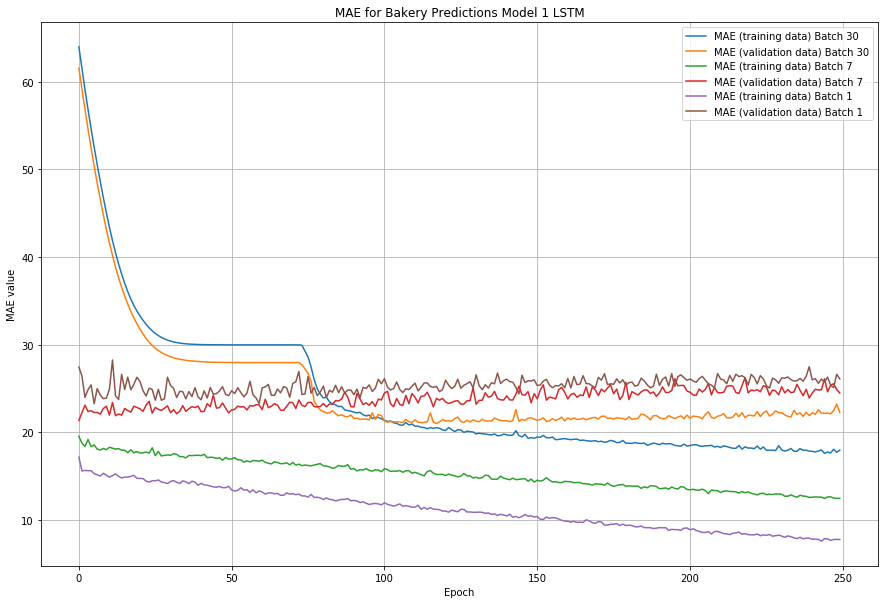

In [134]:
plt.figure(figsize=(15,10))
plt.plot(history_model1_batch30.history['loss'], label='MAE (training data) Batch 30')
plt.plot(history_model1_batch30.history['val_loss'], label='MAE (validation data) Batch 30')
plt.plot(history_model1_batch7.history['loss'], label='MAE (training data) Batch 7')
plt.plot(history_model1_batch7.history['val_loss'], label='MAE (validation data) Batch 7')
plt.plot(history_model1_batch1.history['loss'], label='MAE (training data) Batch 1')
plt.plot(history_model1_batch1.history['val_loss'], label='MAE (validation data) Batch 1')
plt.title('MAE for Bakery Predictions Model 1 LSTM')
plt.ylabel('MAE value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

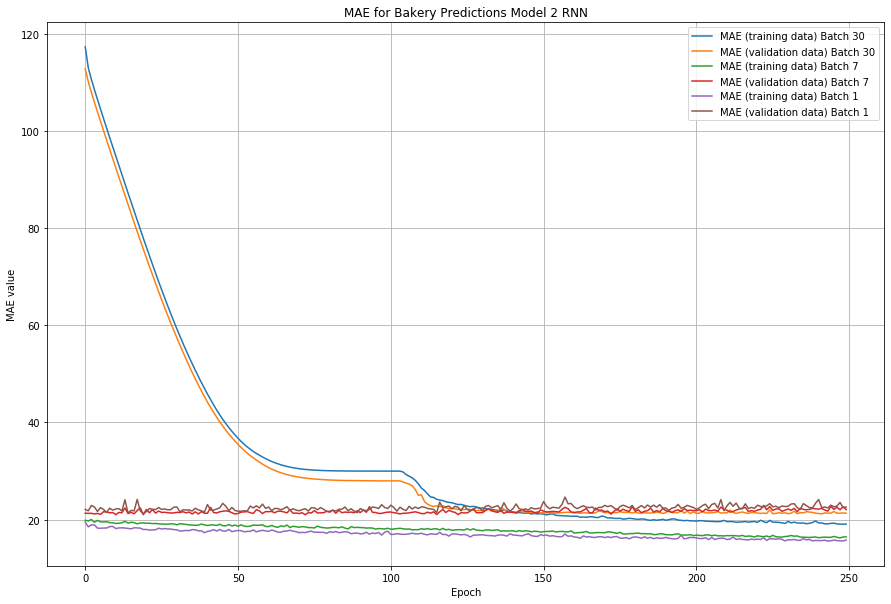

In [135]:
plt.figure(figsize=(15,10))
plt.plot(history_model2_batch30.history['loss'], label='MAE (training data) Batch 30')
plt.plot(history_model2_batch30.history['val_loss'], label='MAE (validation data) Batch 30')
plt.plot(history_model2_batch7.history['loss'], label='MAE (training data) Batch 7')
plt.plot(history_model2_batch7.history['val_loss'], label='MAE (validation data) Batch 7')
plt.plot(history_model2_batch1.history['loss'], label='MAE (training data) Batch 1')
plt.plot(history_model2_batch1.history['val_loss'], label='MAE (validation data) Batch 1')
plt.title('MAE for Bakery Predictions Model 2 RNN')
plt.ylabel('MAE value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

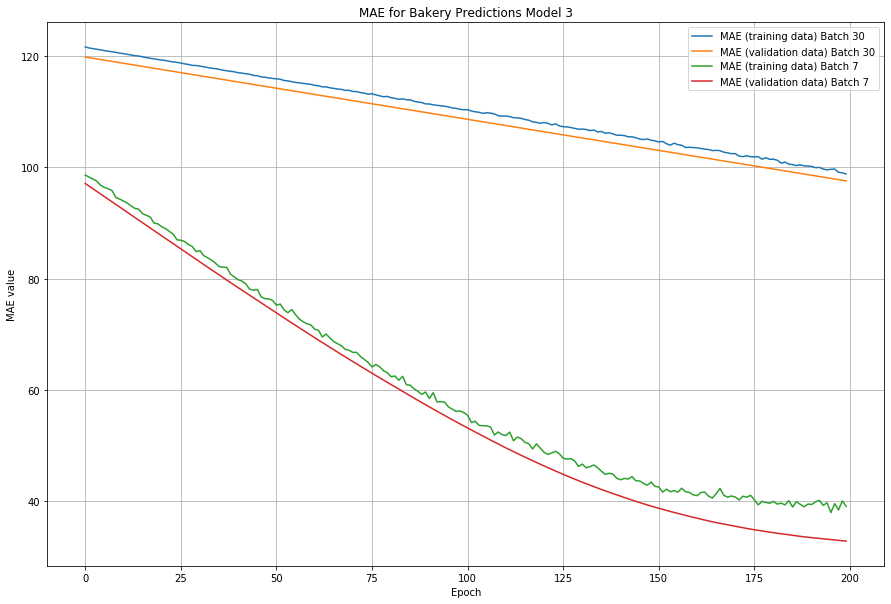

In [136]:
plt.figure(figsize=(15,10))
plt.plot(history_model3_batch30.history['loss'], label='MAE (training data) Batch 30')
plt.plot(history_model3_batch30.history['val_loss'], label='MAE (validation data) Batch 30')
plt.plot(history_model3_batch7.history['loss'], label='MAE (training data) Batch 7')
plt.plot(history_model3_batch7.history['val_loss'], label='MAE (validation data) Batch 7')
plt.title('MAE for Bakery Predictions Model 3')
plt.ylabel('MAE value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
break_here!

In [137]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(434,))
true = pd.DataFrame(y_test,columns=["Test True y"])
pred_df = pd.concat([true,test_predictions],axis=1)
pred_df.columns = ["True","Pred"]
pred_df

NameError: name 'model' is not defined

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="True",y="Pred", data=pred_df, s=60)
plt.plot(pred_df["True"],pred_df["True"],color="black",alpha=0.5)
plt.grid()
plt.ylim(top=300)

In [ ]:
plt.figure(figsize=(15,6))
p1_2 = plt.plot(pred_df[0:100],linewidth=2)
plt.legend(["True","Pred"])
plt.grid()
plt.title("Comparison between true values and predictions")

In [ ]:
plt.figure(figsize=(15,6))
p3 = plt.plot(pred_df["True"][0:100]-pred_df["Pred"][0:100])
plt.grid()
plt.title("Difference between true values and predictions")

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
exp_num = 50

exp_day = df_brot.drop("Umsatz",axis=1).iloc[exp_num]
exp_day_true = df_brot["Umsatz"].iloc[exp_num]
exp_day = exp_day.values.reshape(1,67)

pred_exp = model.predict(exp_day)

["Prediction", pred_exp[0][0][0]], ["True Value", exp_day_true], ["Difference", pred_exp[0][0][0] - exp_day_true],["Percent", pred_exp[0][0][0]/exp_day_true]